In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\User\Downloads\netflix\netflix_titles.csv")

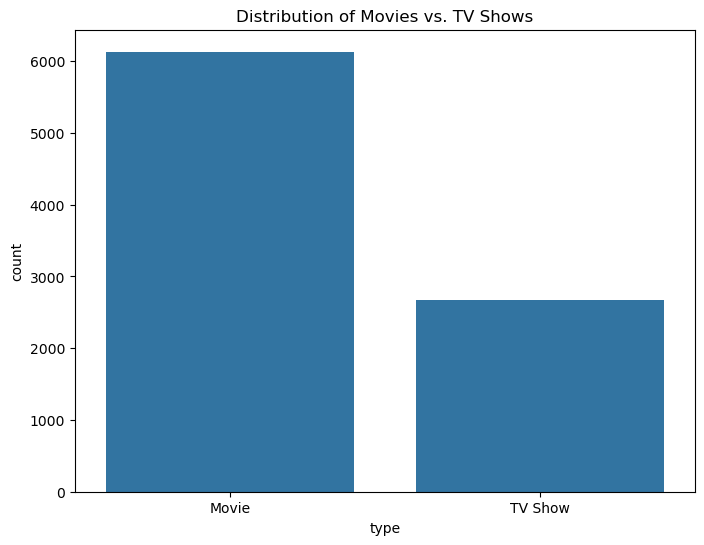

In [3]:
# Task-01: Data Visualization
# Visualize the distribution of movies vs. TV shows
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Movies vs. TV Shows')
plt.show()

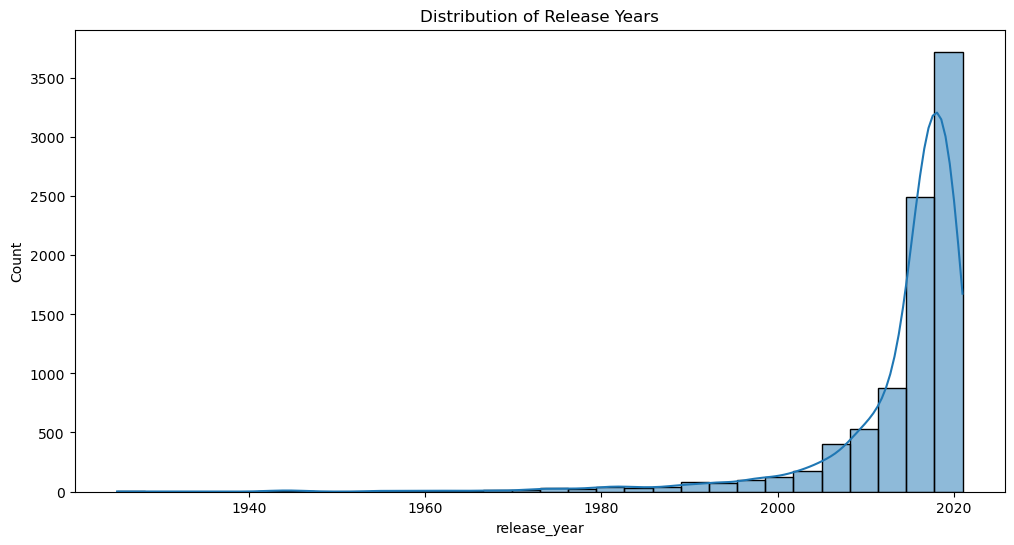

In [4]:
# Visualize the distribution of release years
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.show()

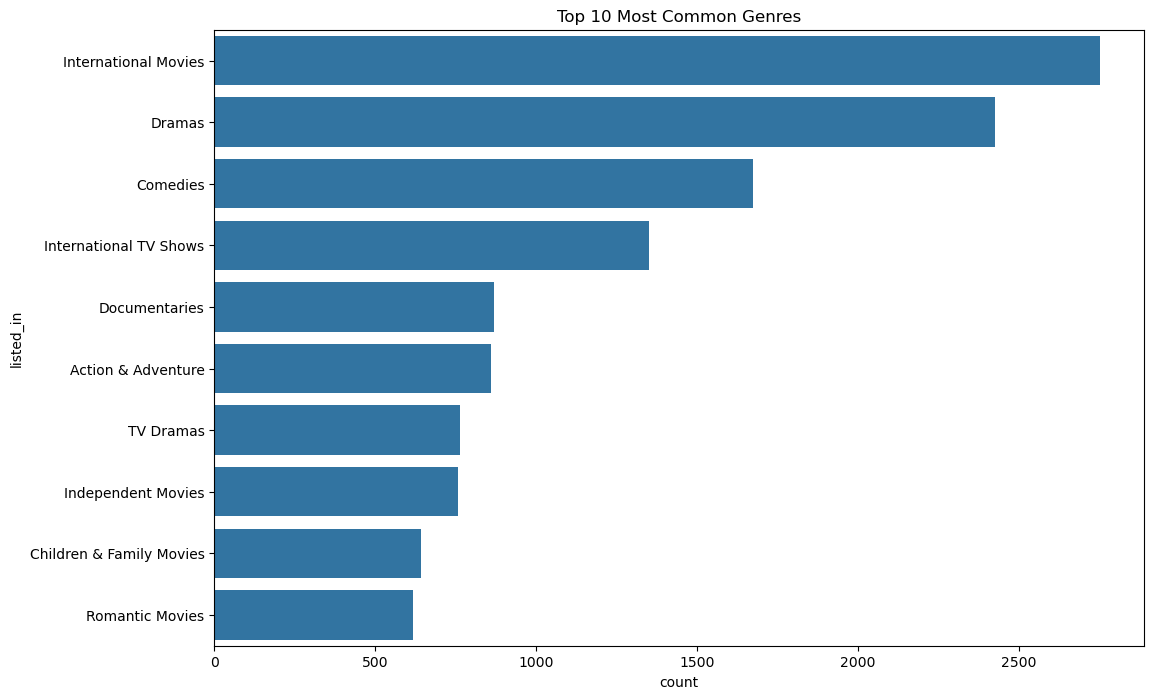

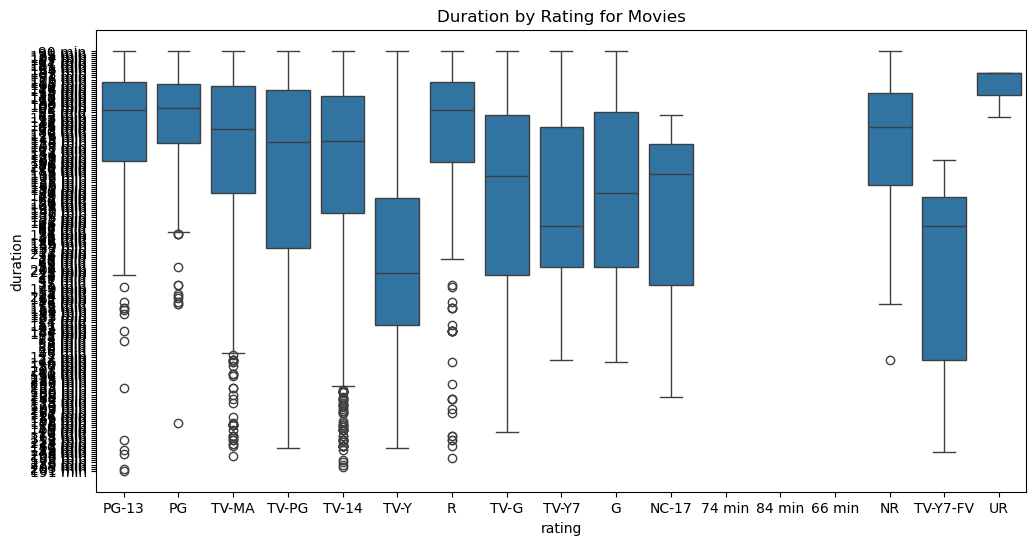

In [5]:
# Task-02: Data Cleaning and EDA
# Handle missing values
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Explore the most common genres
df['listed_in'] = df['listed_in'].astype(str).str.split(', ')
genres = df.explode('listed_in').reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.countplot(y='listed_in', data=genres, order=genres['listed_in'].value_counts().index[:10])
plt.title('Top 10 Most Common Genres')
plt.show()


# Analyze the relationship between duration and rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration', data=df[df['type'] == 'Movie'])
plt.title('Duration by Rating for Movies')
plt.show()

In [6]:
# Task-03: Machine Learning (Decision Tree Classifier)
# Preprocess the data
df['type_encoded'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)
df = df.dropna(subset=['duration', 'release_year'])

# Split the data into features and target
X = df[['duration', 'release_year']]
y = df['type_encoded']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       566
           1       1.00      1.00      1.00      1195

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

Accuracy: 0.9982964224872232


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_6680\3988675862.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['duration'] = df['duration'].str.extract('(\d+)').astype(float)


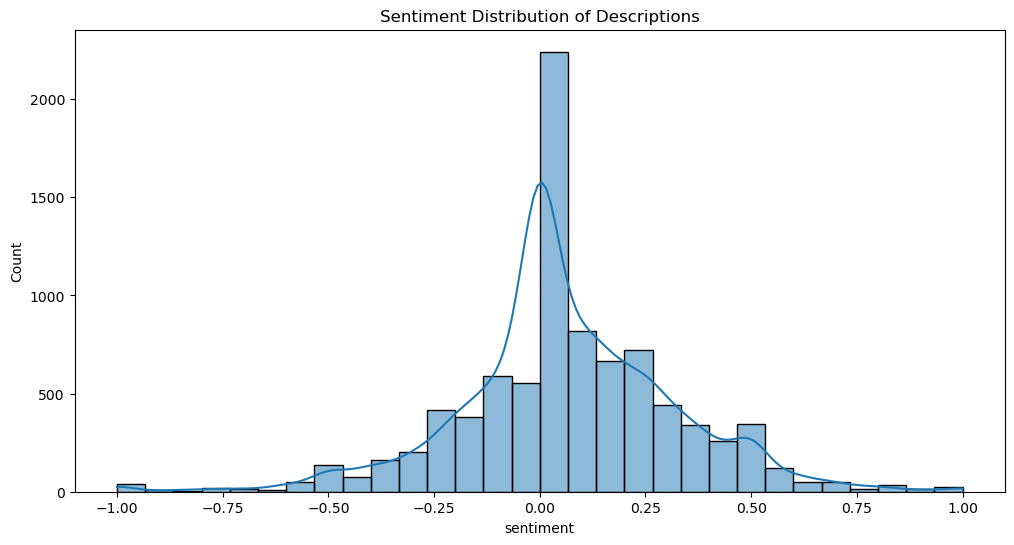

In [7]:
# Task-04: Sentiment Analysis (NLP)
# Perform sentiment analysis on the description column
df['sentiment'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['sentiment'].dropna(), bins=30, kde=True)
plt.title('Sentiment Distribution of Descriptions')
plt.show()